<a href="https://colab.research.google.com/github/Hassan-Mahadjir/Machine-Learning/blob/main/cnn_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

**Loading and preprocessing the dataset**

In [ ]:
batch_size = 60

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 642kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.06MB/s]


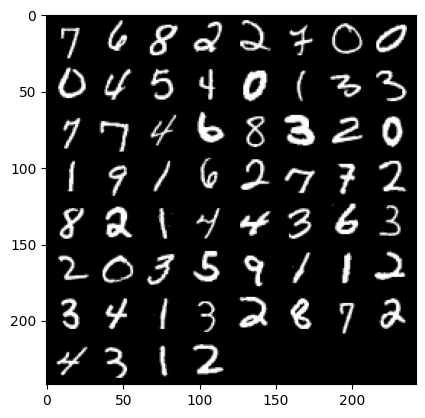

In [ ]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image (for grayscale images, 1)
           * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
      """

    super(CNN,self).__init__()

    # 1st convlutional layer
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # 2nd convolutional layer
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    # Fully connected layer
    self.fc = nn.Linear(in_features=16*7*7, out_features=num_classes)

  def forward(self, x):
     """
     Forward pass of the convolutional neural network.

     Parameters:
         x: Input tensor.

     Returns:
         torch.Tensor
             The output tensor after passing through the network.
      """

     x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
     x = self.pool(x)           # Apply max pooling
     x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
     x = self.pool(x)           # Apply max pooling
     x = x.reshape(x.shape[0], -1)  # Flatten the tensor
     x = self.fc(x)            # Apply fully connected layer
     return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  # Iterate over training batches
  print(f"Epoch: [{epoch + 1}/{num_epochs}]")

  for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
    # Forward pass
     data = data.to(device)
     targets = targets.to(device)
     scores = model(data)
     loss = criterion(scores, targets)

     # Backward pass and optimization
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

Epoch: [1/10]


100%|██████████| 1000/1000 [00:28<00:00, 34.71it/s]


Epoch: [2/10]


100%|██████████| 1000/1000 [00:21<00:00, 47.41it/s]


Epoch: [3/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.93it/s]


Epoch: [4/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.65it/s]


Epoch: [5/10]


100%|██████████| 1000/1000 [00:21<00:00, 45.68it/s]


Epoch: [6/10]


100%|██████████| 1000/1000 [00:20<00:00, 48.12it/s]


Epoch: [7/10]


100%|██████████| 1000/1000 [00:21<00:00, 46.04it/s]


Epoch: [8/10]


100%|██████████| 1000/1000 [00:21<00:00, 46.00it/s]


Epoch: [9/10]


100%|██████████| 1000/1000 [00:21<00:00, 46.20it/s]


Epoch: [10/10]


100%|██████████| 1000/1000 [00:20<00:00, 47.63it/s]


In [ ]:
# Set up of multiclass accuracy metric
acc = torchmetrics.Accuracy(task="multiclass",num_classes=10)
precision = torchmetrics.Precision(task="multiclass", num_classes=10)
recall = torchmetrics.Recall(task="multiclass", num_classes=10)

# Iterate over the dataset batches
model.eval()
with torch.no_grad():
   for images, labels in test_loader:
       # Get predicted probabilities for test data batch
       outputs = model(images)
       _, preds = torch.max(outputs, 1)
       acc(preds, labels)
       precision(preds, labels)
       recall(preds, labels)

#Compute total test accuracy
test_accuracy = acc.compute()
test_precision = precision.compute()
test_recall = recall.compute()

print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")

Test accuracy: 0.9887999892234802
Test precision: 0.9887999892234802
Test recall: 0.9887999892234802
